In [1]:
#!pip install azureml-sdk

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
from azureml.core import Workspace, Dataset


In [3]:
# import dataset

df = pd.read_csv('Data/weather_dataset_raw.csv')


### data quality check

In [4]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


In [5]:
df.isnull().sum()/len(df)

S_No                      0.000000
Timestamp                 0.000000
Location                  0.000000
Temperature_C             0.000000
Apparent_Temperature_C    0.000000
Humidity                  0.000000
Wind_speed_kmph           0.000000
Wind_bearing_degrees      0.000000
Visibility_km             0.000000
Pressure_millibars        0.000000
Weather_conditions        0.000052
dtype: float64

In [6]:
df['Weather_conditions'].fillna(method="ffill",inplace=True,axis=0)

In [7]:
df.isnull().values.any()

False

In [8]:
df.Weather_conditions.value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [9]:

df["Weather_conditions"]=df["Weather_conditions"].apply(lambda x:"rain" if x=="rain" else "no_rain")

In [10]:
df.Weather_conditions.value_counts()

rain       82271
no_rain    14182
Name: Weather_conditions, dtype: int64

In [11]:
df["Weather_conditions"]=df["Weather_conditions"].apply(lambda x:0 if x=="rain" else 1)

In [12]:
df.Weather_conditions.value_counts()

0    82271
1    14182
Name: Weather_conditions, dtype: int64

In [13]:
import numpy as np
#df.info()

In [14]:
df.corr(method ='pearson')

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
S_No,1.000000,0.025480,0.026612,0.041722,-0.006401,-0.027797,0.108975,0.016641,-0.082974
Temperature_C,0.025480,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,-0.378343
Apparent_Temperature_C,0.026612,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,-0.383870
Humidity,0.041722,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,0.130953
Wind_speed_kmph,-0.006401,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,-0.094136
Wind_bearing_degrees,-0.027797,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,-0.059549
Visibility_km,0.108975,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,-0.233369
Pressure_millibars,0.016641,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,-0.040330
Weather_conditions,-0.082974,-0.378343,-0.383870,0.130953,-0.094136,-0.059549,-0.233369,-0.040330,1.000000


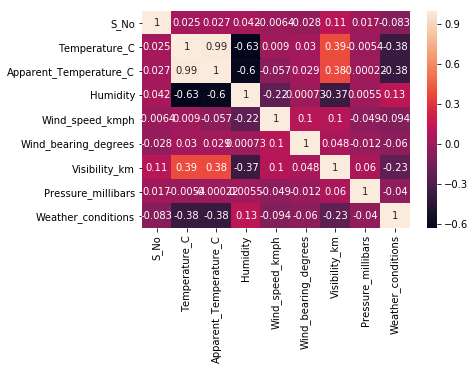

In [15]:


corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()



In [16]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

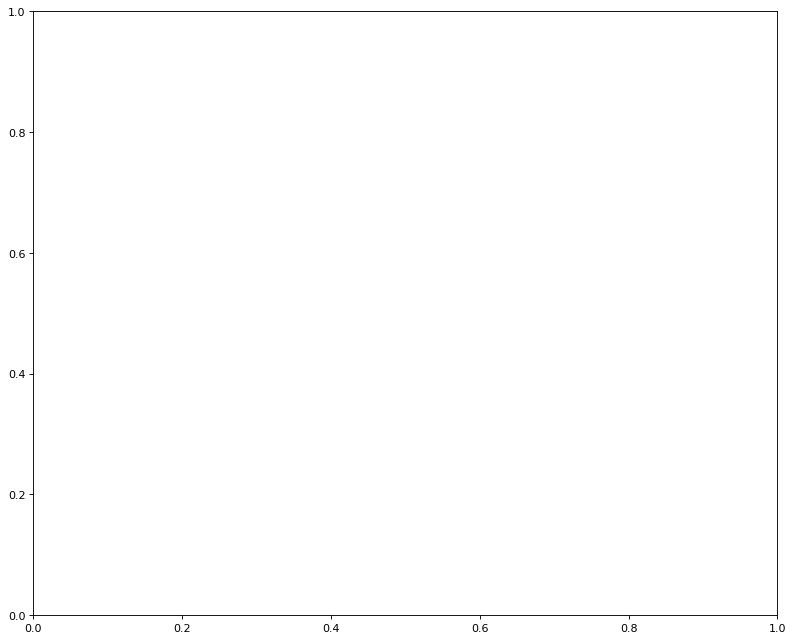

In [17]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='w')
df.corr(method ='pearson')['Weather_conditions'].sort_values(ascending=True).drop(['Weather_conditions']).plot(kind='bar', width=0.9)


In [19]:
# Save processed dataset 
df.to_csv('Data/weather_dataset_processed.csv',index=False)


In [20]:
###register the the data set in azure workspace

In [21]:
subscription_id = "bc3f42af-98e7-4062-b5e3-7afdf0959110"
resource_group = 'Learn_MLOps'
workspace_name = 'MLOps_WS'


In [22]:
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [23]:
# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

In [24]:
# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='Data', target_path='data')


"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 4 files
Target already exists. Skipping upload for data\training_data.csv
Target already exists. Skipping upload for data\validation_data.csv
Target already exists. Skipping upload for data\weather_dataset_processed.csv
Target already exists. Skipping upload for data\weather_dataset_raw.csv
Uploaded 0 files


$AZUREML_DATAREFERENCE_8a35f5bc1f344133a1c80de135b9bb20

In [25]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

In [26]:
# preview the first 3 rows of the dataset from datastore
dataset.take(3).to_pandas_dataframe()



,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,2006-03-31 22:00:00,"Port of Turku, Finland",9.472222,0.89,14.1197,251,15.8263,1015.13,0
1,2006-03-31 23:00:00,"Port of Turku, Finland",9.355556,0.86,14.2646,259,15.8263,1015.63,0
2,2006-04-01 00:00:00,"Port of Turku, Finland",9.377778,0.89,3.9284,204,14.9569,1015.94,0


In [27]:
# Register the data set
weather_ds = dataset.register(workspace=workspace,
                                 name='processed_weather_data_portofTurku',
                                 description='processed weather data')